<a href="https://colab.research.google.com/github/HORVES/DeepLearningPython/blob/master/TD1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TD1 - François LOGAK

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

### Question 1

In [2]:
def gradient_descent(f,x0,eta,epsilon) :
  x = sp.symbols("x")
  df = sp.lambdify(x,sp.diff(f(x),x))
  while(np.abs(df(x0))>epsilon) :
        x0 = x0 - eta*df(x0)
  return x0, f(x0)

### Question 2

In [3]:
g = lambda x : x**2-x+1
eta = 0.01
x0 = 10
epsilon = 0.01

print(gradient_descent(g,x0,eta,epsilon))

(0.5049690791479365, 0.7500246917475785)


### Question 3

In [4]:
f = lambda x : 0.01*(x**4+2*x**3-12*x**2-2*x+6)
eta = 0.01
x0 = 10
epsilon = 0.01

print(gradient_descent(f,x0,eta,epsilon)) #Trouve un minimum local
print(f(-3.28)) # Proche du minimum global

(1.8881103204483922, -0.14384725940152168)
-0.7137273344


### Question 4

In [5]:
f = lambda x : 0.01*(x**4+2*x**3-12*x**2-2*x+6)
eta = 0.2
x0 = 4
epsilon = 0.1

print(gradient_descent(f,x0,eta,epsilon))

#On n'a choisi un epsilon plus grand, l'algorithme termine plus vite
#Le xn renvoyé en sortie est plus éloigné des minima

(2.0683972708749554, -0.1347411825740038)


On a changé les conditions initiales, en prenant $x_0 = 4$, et on a augmenté le taux d'apprentissage $η$ ainsi que le seuil d'arrêt $\epsilon$. L'algorithme termine plus vite et s'arrête en un point différent plus ékiugné du minimum. Cela explique le résultat différent.

### Question 5

In [6]:
c = lambda x : x**2
eta = 2
x0 = 1
epsilon = 0.1

#print(gradient_descent(c,x0,eta,epsilon))

Les $x_n$ vont prendre successivement les valeurs -1 et 1. La dérivée y vaut -2 (resp.2). La comparaison avec epsilon est toujours vérifiée. On ne sort dont jamais de la boucle while.

### Import

6


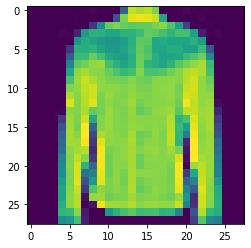

In [7]:
from torchvision import datasets

training_data = datasets.FashionMNIST(".",download=True,train=True)
test_data = datasets.FashionMNIST(".",download=True,train=False)

plt.imshow(training_data[1003][0])
print(training_data[1003][1])

On transforme ces images en vecteurs :

In [8]:
test_data = [(np.ndarray.flatten(np.array(img))/255,cat) for img,cat in test_data]
training_data = [(np.ndarray.flatten(np.array(img))/255,cat) for img,cat in training_data]

np.random.shuffle(training_data)
print(training_data[0])

(array([0.        , 0.        , 0.        , 0.00784314, 0.00784314,
       0.01176471, 0.        , 0.        , 0.        , 0.        ,
       0.41960784, 0.61568627, 0.19607843, 0.        , 0.        ,
       0.        , 0.49411765, 0.29019608, 0.        , 0.        ,
       0.        , 0.        , 0.00784314, 0.00392157, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00784314, 0.        , 0.        ,
       0.21568627, 0.43529412, 0.89019608, 0.86666667, 0.88627451,
       1.        , 0.94509804, 0.88235294, 0.99215686, 0.93333333,
       0.84313725, 0.7254902 , 0.35294118, 0.04313725, 0.        ,
       0.        , 0.00392157, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01176471,
       0.        , 0.08627451, 0.7254902 , 0.81176471, 0.81960784,
       0.81960784, 0.79607843, 0.79215686, 0.80392157, 0.88235294,
       0.89411765, 0.88235294, 0.81568627, 0.80784314, 0.8431

In [9]:
def propagate(w,b,training_data) :
  cout = 0
  gradb = 0

  if(len(w)!=len(training_data[0][0])) :
    raise TypeError("w n'est pas de la bonne taille")

  gradw = np.zeros(len(w))
  n = len(training_data)

  for x,y in training_data :
    cout += ((y-np.vdot(w,x)-b)**2)/n
    gradb += -2*(y-np.vdot(w,x)-b)/n
    gradw += -2*(y-np.vdot(w,x)-b)*x/n

  return (cout,gradw,gradb)

### Question 7

In [10]:
def optimize_gd(w,b,training_data,rate=5e-3,maxiter=1000,info=10,epsilon=0.01) :
  iter = 0
  costs = []
  cout, gradw, gradb = propagate(w,b,training_data)
  normGrad = np.linalg.norm(gradw)**2 + gradb**2
  while(normGrad>epsilon and iter<maxiter) :  #J'ai rajouté un seuil d'arrêt epsilon
    w = w - rate*gradw
    b = b - rate*gradb
    costs.append(cout)
    if(iter%info ==0) :
      print(cout)
    cout, gradw, gradb = propagate(w,b,training_data)
    normGrad = np.linalg.norm(gradw)**2 + gradb**2
    iter +=1
  return(w,b,costs)

In [11]:
training_data_2 = training_data[0:10000]
w = np.zeros(len(training_data_2[0][0]))
b=0
optimize_gd(w,b,training_data_2,rate=5e-3,maxiter=1000,info=10,epsilon=0.01)

28.586099999998545
4.803525558752612
3.9312176256265614
3.6771824970957594
3.5435757846000002
3.454289074310843
3.38671215586122
3.331596312757757
3.2844671960843588
3.2428768829742656
3.2053569327496345
3.170966073612668
3.1390705961600895
3.109226708613931
3.081112778925864
3.054488323527646
3.0291683117733004
3.0050066349987903
2.9818852251427734
2.959706733638286
2.9383894961015544
2.917863990762209
2.8980702907893874
2.8789561905191494
2.860475797702686
2.8425884546129203
2.825257895985485
2.808451580954252
2.7921401552709066
2.776297012829516
2.7608979341280357
2.74592078522033
2.731345264858625
2.7171526904787466
2.703325815819838
2.68984867454589
2.6767064454151788
2.663885335437248
2.65137247814557
2.6391558446476537
2.6272241655355244
2.6155668620734374
2.6041739853465415
2.5930361622708977
2.582144547540027
2.5714907807277423
2.561066947884832
2.550865547065243
2.5408794572993556
2.5311019106000967
2.521526466644636
2.5121469898236612
2.502957628390227
2.493952795476046
2.48

(array([-2.31292028e-06,  1.10350791e-05,  3.59627417e-04,  2.48731422e-03,
         2.10382637e-03, -2.32835547e-03,  2.81944786e-03,  2.77995795e-03,
         1.93262783e-02,  4.75386646e-02, -5.27819441e-02, -1.82966497e-01,
         8.82275628e-03,  5.55404330e-02,  1.00835239e-01,  1.22485293e-01,
        -5.55692242e-02, -1.67797025e-01, -5.88885055e-03,  1.42663571e-02,
         9.44112507e-03,  2.34336388e-02,  3.19877358e-02,  1.68481472e-02,
         3.21721419e-03,  3.89212407e-03,  2.12475707e-03,  2.02293183e-05,
         4.18844311e-05,  6.78163686e-05,  2.01995145e-04,  6.91472936e-03,
         1.45572782e-02,  1.34623078e-02,  4.52227571e-02,  4.27724003e-02,
        -1.19355595e-02, -1.12571589e-01, -2.00083601e-01, -1.53565948e-01,
         5.49354061e-02,  2.19601960e-02,  6.76950343e-03,  1.03580737e-01,
        -5.55112321e-02, -2.55752271e-01, -1.44703666e-01, -7.54611043e-02,
         6.77154294e-03,  5.75233959e-02,  6.59852508e-02,  6.11799743e-02,
         2.3

### Question 8

In [12]:
def test_params(w,b,test_data) :
  nbAccurate = 0
  for x,y in test_data :
    if (np.abs(np.vdot(x,w) + b - y) <= 0.5):
      nbAccurate += 1
  return nbAccurate/len(test_data)

In [13]:
w = np.array([-1.84861562e-05, -4.39139075e-05,  5.25637805e-04,  2.90200748e-03,
         5.10619273e-04,  5.69138149e-03,  1.47246014e-02,  1.12552321e-02,
         1.53793442e-02,  4.62044230e-02, -4.35319238e-02, -1.45009482e-01,
         3.20157748e-02,  8.64140551e-02,  1.00105811e-01,  1.16626177e-01,
        -9.28753700e-02, -1.75445775e-01, -5.09043693e-02, -3.80819390e-03,
         1.72365941e-02,  2.79618459e-02,  2.97386449e-02,  2.60721658e-02,
         5.78615677e-03,  6.62459344e-03, -1.46992750e-04, -1.71577718e-04,
         7.79334568e-04,  2.54269163e-03,  6.50640021e-03,  5.16473992e-03,
         1.67657508e-02,  3.11758263e-02,  4.85854866e-02,  2.76348527e-02,
        -2.77261729e-02, -9.84741511e-02, -1.60137863e-01, -1.39530695e-01,
         7.08677499e-02,  4.39445392e-02, -6.24557249e-03,  9.06871916e-02,
        -5.74278150e-02, -2.80575000e-01, -1.71134593e-01, -9.66142571e-02,
        -4.23664779e-02,  3.07753782e-02,  6.24006323e-02,  4.79575124e-02,
         2.81870401e-02,  1.85017546e-02,  7.61563953e-03, -1.70018729e-03,
         3.17666629e-03,  9.99242810e-03,  2.58154316e-02,  3.40050467e-02,
         1.07160174e-02, -1.26869812e-02, -6.81058138e-02, -9.40229147e-02,
        -5.63757927e-02, -4.12849646e-02, -1.15069672e-02, -1.70691083e-02,
         2.90277230e-02,  8.45804960e-02,  9.77889679e-02,  5.41983987e-02,
        -2.42968213e-02,  1.07250823e-02, -1.83252951e-02, -5.35151468e-02,
        -7.67015113e-02, -1.06367156e-01, -5.18188924e-02,  6.95984740e-03,
         3.78885636e-02,  3.12312269e-02,  1.72309667e-02,  1.98896452e-03,
         5.42846376e-03,  2.29354380e-02,  3.48247077e-02,  5.02433317e-02,
        -2.20711757e-02, -1.26257626e-01, -8.47693898e-02,  7.35467018e-02,
         8.54995899e-02, -1.86290974e-02, -1.10118815e-01, -9.20380670e-02,
        -1.05269756e-02,  1.20969420e-02, -1.17560750e-02, -7.62873664e-03,
        -3.93501715e-03, -6.20984738e-02, -3.23931800e-02,  8.92578119e-02,
         1.17416230e-01, -3.00045338e-02, -1.59890756e-01, -6.23036300e-02,
         3.77358391e-02,  5.34273477e-02,  2.38485562e-02,  1.08831070e-02,
         8.32331810e-03,  3.60270162e-02,  4.25949825e-02,  2.08310759e-02,
        -8.40300438e-02, -1.41090219e-01,  1.80666383e-02,  3.93616886e-02,
        -5.82191585e-02, -1.46300164e-01, -1.67534216e-01, -1.19242383e-01,
        -6.43030055e-02, -5.97908429e-02, -2.09446910e-02, -2.01631222e-02,
         2.15160117e-02, -5.78498075e-02, -8.14275627e-02, -2.63856098e-02,
         2.52270994e-02,  6.11552913e-02, -6.23636917e-02, -1.42572854e-01,
         2.74418681e-02,  6.87817966e-02,  3.63530008e-02,  1.19829132e-02,
         1.07980320e-02,  4.49423696e-02,  6.49705572e-02,  6.82540572e-03,
        -1.16557836e-01, -9.50965650e-02, -4.12854081e-02, -4.16334287e-02,
        -8.96196476e-02, -8.18141718e-02, -1.12986304e-01, -1.13929206e-01,
        -8.91887517e-02, -4.61870420e-02,  1.32378308e-02, -2.10986986e-02,
        -4.89763658e-03, -3.60268075e-02, -1.54961998e-02, -1.06431602e-02,
        -2.68613575e-02,  5.84959823e-03, -2.21168631e-02, -1.21710970e-01,
        -1.63660468e-02,  8.34073028e-02,  7.49919024e-02,  2.45416521e-02,
         2.39073914e-02,  6.86599240e-02,  7.49030539e-02,  1.10492593e-02,
        -1.00984370e-01, -7.20364408e-02, -7.37681668e-02, -4.76314970e-02,
        -9.01345777e-02, -7.63995457e-02, -8.46273674e-02, -8.65270879e-02,
        -4.46106027e-02, -2.73105641e-03,  1.29936765e-02, -2.03651142e-02,
         1.24558124e-02,  1.01762282e-02,  1.97033388e-03, -1.25138641e-02,
        -3.06330439e-02,  1.37965186e-02, -1.43716663e-02, -7.69936395e-02,
        -1.85326371e-02,  9.10299776e-02,  1.06389897e-01,  4.42739032e-02,
         3.15484448e-02,  8.39497609e-02,  7.67176110e-02, -2.75474724e-02,
        -1.14992471e-01, -6.58498822e-02, -9.95296321e-02, -2.68637944e-02,
        -6.15809436e-02, -4.94240553e-02, -5.85414782e-02, -2.21828102e-02,
        -2.50357022e-02, -1.26515093e-02, -9.15936757e-03, -2.67134838e-02,
         2.57124517e-02,  3.60005779e-02,  2.45251340e-02, -4.56430128e-03,
        -1.55806798e-02, -1.54096738e-02, -2.20743666e-02, -3.02624396e-02,
        -2.92771586e-02,  1.16917134e-01,  1.10814579e-01,  5.49966212e-02,
         3.70808878e-02,  8.25593890e-02,  6.75288623e-02, -4.36986026e-02,
        -1.06500115e-01, -6.55665869e-02, -1.20005324e-01, -2.61559103e-02,
        -6.28221417e-02, -4.91870429e-02, -3.95913697e-02, -2.65862023e-02,
        -5.62129160e-02, -2.68073186e-02, -6.76967069e-02, -9.27042372e-03,
         4.49960485e-03,  4.41103078e-03, -7.10710008e-03,  1.25767818e-02,
         4.70557530e-02, -3.99811324e-02, -3.66628159e-02,  5.57958745e-03,
        -1.22805357e-02,  1.23905662e-01,  9.88736843e-02,  5.09459769e-02,
         4.78291939e-02,  9.35663501e-02,  4.26767136e-02, -4.76414148e-02,
        -6.17620218e-02, -7.27751687e-02, -1.67302140e-01, -4.02388398e-02,
        -2.16983589e-02, -6.60438230e-02, -5.64046979e-02, -6.59366314e-02,
        -6.76856623e-02, -5.98568764e-02, -4.23564392e-02,  2.34235132e-02,
         1.91866224e-03,  1.97766277e-02, -2.89574894e-02,  2.64415080e-02,
         1.00550282e-01, -9.07371690e-02, -7.18145040e-02,  8.71458694e-03,
         1.06895701e-02,  1.08841805e-01,  6.48967080e-02,  3.90268027e-02,
         6.78621345e-02,  1.09232018e-01,  4.63967371e-02,  1.20203584e-02,
        -8.69664431e-03, -7.48361642e-02, -1.63829642e-01, -1.96215156e-02,
        -3.65381111e-02, -8.71443088e-02, -4.20483036e-02, -7.05313554e-02,
        -4.12197124e-02, -3.77971376e-02,  7.82214417e-03,  1.83783759e-02,
         1.41890806e-02,  2.83862114e-02, -9.58807723e-03, -1.82063774e-02,
         5.86041955e-02, -9.10944441e-02, -5.74326348e-02,  3.99183846e-02,
         2.67610210e-02,  9.32890753e-02,  1.00309532e-01,  4.33750108e-02,
         7.28570719e-02,  9.90987199e-02,  4.12151633e-02,  1.83719472e-02,
         1.68030561e-02, -1.88919339e-02, -8.11918102e-02,  1.14875587e-02,
         5.09778249e-03, -5.18537041e-02, -2.09916452e-02, -4.47891419e-02,
        -1.58903991e-02, -2.07148300e-03, -7.14792812e-03,  4.53113314e-02,
        -1.96757964e-03,  2.50885754e-02,  4.03304734e-02, -1.73206135e-02,
         5.95892077e-02, -4.82248893e-03, -3.42681623e-04,  5.58251371e-02,
         5.20359359e-02,  9.91715382e-02,  1.05067428e-01,  4.26587594e-02,
         7.52140081e-02,  8.76908625e-02,  3.84203235e-02,  3.09907162e-02,
         4.95080202e-02,  2.47886256e-02, -9.02786204e-03,  6.37785792e-02,
         4.64924739e-02, -6.27140131e-03,  2.16504397e-02,  2.27747544e-02,
        -6.42007155e-03, -1.58816313e-02,  4.05732201e-02,  4.42561620e-02,
         2.49932743e-02,  4.30476040e-02,  8.77594487e-02,  4.95408777e-02,
         1.24788467e-01,  9.77911989e-02,  5.29594693e-02,  9.15597082e-02,
         6.17307061e-02,  8.18712864e-02,  5.97701817e-02,  4.33501170e-02,
         7.70538613e-02,  8.67046213e-02,  4.14598039e-02,  4.34877751e-02,
         8.37835521e-02,  5.24055956e-02,  3.87918081e-02,  1.01884848e-01,
         3.73414573e-02, -2.75296045e-04,  3.78299421e-02, -2.74877012e-03,
        -3.53986505e-02, -1.83091816e-03,  8.63084983e-02,  6.15755710e-02,
         4.36836757e-02,  5.33501394e-02,  1.08732010e-01,  9.16048896e-02,
         1.32129806e-01,  1.01000795e-01,  7.76877885e-02,  8.24535713e-02,
         5.77272244e-02,  7.95517317e-02,  1.50022354e-02,  7.41183520e-02,
         5.87185910e-02,  9.64924957e-02,  3.31130131e-02,  4.39176101e-02,
         6.00128331e-02,  6.62036699e-02,  3.52122222e-02,  6.92790110e-02,
        -1.30619184e-02, -6.56988673e-03, -4.05056324e-02, -5.04667342e-02,
        -1.66323603e-02,  1.78944480e-02,  9.46206978e-02,  7.93817127e-02,
         4.98912790e-02,  5.93110973e-02,  1.06453153e-01,  6.92976539e-02,
         1.12209437e-01,  8.36695103e-02,  6.68819341e-02,  4.72775711e-02,
         3.43067116e-02,  5.37533273e-02, -3.64985363e-03,  8.12941608e-02,
         6.67889522e-02,  9.39793094e-02,  2.93100748e-02,  4.62548701e-02,
         5.83367283e-02,  7.06740534e-02,  1.06998400e-02,  1.74817884e-02,
        -4.73946765e-02,  2.73751930e-02, -3.82148937e-02,  2.60806740e-03,
         9.05729911e-03,  3.47357287e-02,  1.26873350e-01,  7.79481913e-02,
         6.83676289e-02,  5.08956613e-02,  1.29118421e-01,  1.28205263e-01,
         1.23608191e-01,  8.26813029e-02,  6.72708961e-02,  4.69090322e-02,
         7.25130438e-02,  4.96527227e-02,  1.55731044e-02,  8.81208387e-02,
         6.62565698e-02,  5.65893516e-02,  7.02530900e-03,  2.64437449e-02,
         5.84444028e-02,  2.48817989e-02,  3.55653123e-03,  6.49183948e-03,
        -4.91875555e-02,  9.90825746e-03,  1.40657432e-03,  1.77174954e-02,
        -1.93270712e-03,  5.50085039e-02,  9.74734963e-02,  4.08324456e-02,
         4.44163983e-02,  5.62126287e-02,  8.82995313e-02,  1.39743816e-01,
         1.21969917e-01,  9.95290524e-02,  7.93717502e-02,  8.72275951e-02,
         8.37282715e-02,  6.97960891e-02,  1.46141755e-02,  7.81392056e-02,
         5.24931252e-02,  7.61055398e-02,  2.91822971e-02,  2.25266127e-02,
         1.94915232e-02, -2.97402677e-02, -2.39172584e-02, -2.31523462e-02,
        -9.65064847e-02,  7.78197587e-03, -2.96560030e-02, -4.54053378e-02,
        -4.39446315e-02,  2.44786131e-02,  9.02996938e-02,  1.98658492e-02,
         9.03545635e-03,  3.43344729e-02,  1.04466192e-01,  8.91698288e-02,
         6.14721868e-02,  7.80641768e-02,  3.69830554e-02,  4.71242549e-02,
         6.24883367e-02,  4.80855961e-02,  1.87715297e-02,  5.96163288e-02,
         2.06162802e-02,  3.89152066e-02,  1.42231158e-02,  3.38464452e-02,
         2.98872933e-02, -2.07593141e-02, -2.73299943e-02, -3.49842184e-02,
        -7.58672568e-02,  1.45420878e-02, -5.48407252e-02, -5.28982531e-02,
        -3.48726714e-02, -3.48819051e-02,  4.78295659e-02,  5.37678293e-04,
        -6.05356145e-03,  2.83562002e-02,  6.69005116e-02,  5.16326380e-02,
         5.69741663e-02,  9.10839419e-02,  7.41974053e-02,  5.80286570e-02,
         6.86070991e-02,  2.95609698e-02,  1.05049689e-02,  3.12230923e-02,
         2.15511154e-02,  2.18817572e-02,  2.00030940e-02, -5.17465885e-03,
        -1.10877053e-02, -4.75534696e-02, -3.67682147e-02,  1.37269301e-03,
        -5.25131387e-02, -1.13537072e-02, -3.28496304e-02, -1.73834691e-02,
        -2.32405111e-02, -1.66969680e-02,  5.49490903e-02,  9.05772364e-03,
         6.24087607e-02,  6.69394942e-02,  6.24347637e-02,  5.55628779e-02,
         6.08772241e-02,  1.09901534e-01,  9.00522503e-02,  3.61422582e-02,
         6.34258044e-02,  2.72772143e-02,  7.11782976e-03,  2.10659492e-02,
         1.48175129e-02,  1.78419616e-02,  3.13384358e-02,  1.69950595e-02,
         3.38586435e-02, -1.72413878e-03,  3.13724746e-02,  2.46794909e-02,
        -4.57741008e-02,  1.32352549e-02, -3.94354040e-03, -2.19886752e-03,
        -2.09292158e-02,  1.17296647e-02,  1.04687539e-01,  3.74439198e-02,
         1.93233711e-02,  3.22052410e-02,  1.06903839e-02, -2.72337408e-03,
         2.23247379e-02,  6.88418776e-02,  6.78755684e-02,  4.62418839e-02,
         6.63929217e-02,  3.68390481e-02,  2.61157357e-02,  2.05147543e-02,
         7.71281996e-03,  1.64701279e-02,  2.82317194e-02,  3.27891511e-02,
         6.49336009e-02,  1.19017988e-02,  5.43117961e-02,  5.90577316e-02,
        -6.66516067e-04,  3.65328197e-02,  1.55903270e-02,  7.54597988e-03,
        -1.93842696e-02,  4.33483902e-02,  1.23870350e-01,  2.93345383e-02,
         2.46003799e-02, -7.72453603e-03, -1.58477599e-02, -3.10081422e-02,
         4.18805583e-02,  8.01503009e-02,  5.98050203e-02,  4.10603045e-02,
         6.47814933e-02,  1.90891978e-02,  1.97481238e-02,  9.87704111e-03,
         3.24410154e-02,  1.84868050e-02, -2.36532632e-03,  7.22271483e-04,
         3.32485341e-02, -2.16768388e-03,  6.02118454e-02,  7.48804681e-02,
         2.32631939e-02,  2.53047163e-02,  3.85309710e-02,  3.51189462e-02,
        -1.53953204e-02,  1.43270669e-02,  1.01394859e-01,  2.23907811e-02,
         5.73508230e-04, -1.63112655e-02, -3.32681080e-02, -2.98129862e-02,
         1.65280177e-02,  6.58537425e-02,  4.87649259e-02,  1.99892351e-02,
         3.09866811e-02,  1.13317430e-03,  2.01058483e-03,  1.82026823e-02,
         3.77010266e-02,  3.23423157e-02,  1.23973797e-03,  2.02093936e-03,
         2.35953958e-02, -3.36661413e-03,  6.52580139e-02,  6.18771769e-02,
         1.39542653e-02, -7.33601544e-03, -1.21083012e-02, -3.65083178e-03,
        -6.41302556e-02, -2.13637952e-02,  8.51787308e-02, -2.64825182e-03,
        -7.25983081e-03, -2.20363494e-02, -6.89668167e-02, -5.59146353e-02,
        -6.73482537e-03,  2.42464412e-02,  3.81368227e-03, -2.31506064e-02,
        -2.33551017e-02, -1.78311383e-02, -2.01269350e-02,  2.02344218e-02,
         2.28690198e-02,  2.84758710e-02,  8.58738091e-03,  2.29634611e-02,
         1.49651494e-02,  1.63853910e-02,  7.37275040e-02,  6.50354746e-02,
         3.47333215e-02,  2.23823375e-02, -4.58560303e-03,  2.34892229e-03,
        -4.61560673e-02,  2.00444267e-02,  8.43913930e-02, -1.51815239e-02,
        -5.28622483e-02, -9.27675017e-02, -8.66557684e-02, -6.78123017e-02,
        -2.09833566e-02,  1.41455263e-02, -4.17457497e-03, -2.51094669e-02,
        -4.63019069e-02, -9.65218216e-03, -3.07983552e-02,  1.11651738e-02,
         1.31243757e-02,  1.23274630e-02,  1.52496856e-02,  2.71257710e-02,
         3.07856623e-02,  1.25055007e-02,  4.41696662e-02,  3.47223513e-02,
         3.04000315e-02,  5.98109615e-02,  5.36581560e-02,  4.31137431e-02,
         3.77784925e-03,  8.92923638e-02,  1.09826000e-01, -5.46190685e-03,
        -4.45020493e-02, -5.73088248e-02, -4.50705462e-02, -4.83984639e-02,
        -6.22278369e-02, -7.00740098e-03, -1.83848178e-02, -4.95157066e-02,
        -4.24586609e-02, -1.93023546e-02, -5.00341754e-02,  8.07186777e-03,
        -1.66414786e-03, -1.04620934e-02, -3.16621027e-03,  1.78067152e-02,
         2.25314563e-02, -1.88317120e-02,  2.62766312e-02, -3.40418768e-02,
        -3.50740126e-02,  6.55514806e-02,  1.30546274e-01,  1.48154152e-01,
         1.07582076e-01,  1.53106570e-01,  1.84178051e-01,  2.57240080e-02,
         2.03314172e-03,  2.65749049e-02,  3.58499534e-02, -8.38448801e-02,
        -1.74251281e-01, -7.04673816e-02, -5.24855066e-02, -6.18483787e-02,
        -1.38850937e-02, -2.59709277e-03, -1.83797179e-02, -8.17803390e-03,
         9.84759703e-04, -1.82570990e-03, -6.04957032e-03, -1.69172540e-02,
        -2.18153377e-02, -6.72700562e-02, -3.50402891e-02, -1.45616762e-02,
        -6.65772854e-02, -4.12317217e-02,  5.65615876e-02,  1.05454754e-01,
         1.04091920e-01,  1.42083021e-01,  1.55995805e-01,  5.62197377e-02,
         3.42317794e-03, -2.93884963e-02, -7.65804264e-02, -1.41818377e-01,
        -1.13659004e-01, -2.80927750e-02, -4.18378895e-02, -3.66215695e-02,
        -6.81952804e-03,  2.85928772e-03, -2.99288498e-03, -7.27937694e-04])
b = 2.095270438233331

In [14]:
test_params(w,b,test_data)

0.3438

On obtient une précision de 34,4 %.

### Question 9

In [15]:
def optimize_sgd(w,b,training_data,rate=5e-4,maxiter=40,info=1,epsilon=0.001) :
  iter = 0
  normGrad = 1
  n = len(training_data)
  costs = []

  while(normGrad>epsilon and iter<maxiter) :
    for i in range(len(training_data)):
      cout, gradw, gradb = propagate(w,b,training_data[i:i+1])
      w = w - rate*gradw
      b = b - rate*gradb
    cout = 0
    for x,y in training_data :
      cout += ((y-np.vdot(w,x)-b)**2)/n
    costs.append(cout)
    if(iter%info == 0) :
      print(cout)
    iter +=1 
    normGrad = np.linalg.norm(gradw)**2 + gradb**2
  return(w,b,costs)

In [16]:
training_data_2 = training_data[0:10000]
w = np.zeros(len(training_data_2[0][0]))
b=0

w,b,costs = optimize_sgd(w,b,training_data_2,rate=5e-5,maxiter=40,info=1,epsilon=0.00001)
print(w,b,costs)
test_params(w,b,test_data)

3.212408138101427
2.9421114289907764
2.7624818818786983
2.627614093621753
2.521196807566599
2.4348837544237436
2.3636267730574154
2.304053780854593
2.2537655094926086
2.210980768950035
2.17433702403532
2.1427689336472455
2.115429682899371
2.0916375011373463
2.0708378708633117
2.052575988366884
2.0364761957500535
2.022226314991812
2.009565525905696
1.9982748652615139
1.9881697011965864
1.979093719219622
1.9709140797206806
1.9635174930715087
1.956807019891986
1.9506994488305998
1.945123137363909
1.9400162260334763
1.935325155486506
1.931003430248683
1.9270105844493108
1.9233113135416897
1.9198747430034002
1.9166738104952576
1.9136847423296024
1.9108866085962455
1.9082609441031095
1.9057914245562262
1.9034635892403915
1.9012646029554094
[-1.70063081e-05 -8.16661026e-05  8.99376292e-04  6.94155344e-03
  9.66261658e-04 -1.33465939e-02 -8.22083898e-03 -4.13757861e-02
 -2.67141677e-02  6.37375061e-02 -6.22532698e-02 -4.37685345e-01
 -1.00692577e-01  4.07075070e-02  1.99874545e-01  2.52017215e

0.3615

Avec la méthode stochastique, et un learning rate de $5.10^{-5}$, on obtient une accuracy du modèle dans 36,0% des cas. On remarque que pour parvenir à faire converger l'algorithme stochastique, on doit prendre un learning rate beaucoup plus faible. 

In [17]:
training_data_2 = training_data[0:10000]
w = np.zeros(len(training_data_2[0][0]))
b=0

w,b,costs = optimize_sgd(w,b,training_data_2,rate=5e-4,maxiter=40,info=1,epsilon=0.00001)

print(w,b,costs)
test_params(w,b,test_data)

2.280997429515473
2.075029077723021
2.004088441543612
1.9701032875960172
1.9500645895771729
1.9365558254175752
1.9266457885659396
1.9189735931823912
1.9128172342713423
1.907750777215898
1.9035018470815588
1.899885474209616
1.896770250809077
1.8940595390138002
1.891680313854378
1.8895761714806614
1.887702752099633
1.8860246349670515
1.8845131689247565
1.8831449185187665
1.8819005271768354
1.8807638700688067
1.8797214125433763
1.878761717221602
1.8778750603935779
1.8770531299944857
1.8762887853012455
1.8755758639091527
1.8749090253431233
1.8742836233561355
1.8736956009112071
1.8731414032615548
1.8726179055900092
1.872122352450495
1.8716523068426685
1.8712056071996885
1.8707803309141606
1.870374763294531
1.8699873710536339
1.869616779596582
[-1.55007577e-04 -2.17946912e-03  5.48410007e-03  3.75333202e-02
 -5.32964376e-02 -1.44465141e-01 -1.93897130e-01 -4.27416200e-01
 -3.32245179e-01 -9.02678011e-02  6.59724304e-03 -7.42507580e-01
 -2.57811527e-01 -3.13710820e-01  4.02807812e-01  5.65993

0.338

Avec ce taux d'apprentissage plus élevé $\eta = 5.10^{-4} $, on arrive à 34% d'accuracy.

In [18]:
training_data_2 = training_data[0:10000]
w = np.zeros(len(training_data_2[0][0]))
b=0

w,b,costs = optimize_sgd(w,b,training_data_2,rate=5e-6,maxiter=40,info=1,epsilon=0.00001)

print(w,b,costs)
test_params(w,b,test_data)

4.892069654542934
3.9462682810794116
3.680541799220789
3.5448565870116817
3.455060538738922
3.3873641759330835
3.3322369426717193
3.285115771947538
3.243527824522148
3.2060010049368044
3.171596051480676
3.1396818763419705
3.1098166881351608
3.0816801731763155
3.0550326762345423
3.02968968558322
3.0055054235327834
2.9823620374720408
2.960162320056451
2.938824697595871
2.918279702793118
2.8984674364471825
2.8793357003835114
2.8608385948190906
2.8429354435167498
2.82558995496281
2.8087695568756663
2.792444860440929
2.776589223383387
2.7611783895865845
2.7461901888875335
2.7316042848093085
2.717401960940188
2.7035659387964244
2.690080221574726
2.6769299593700175
2.6641013323225735
2.651581448840384
2.639358256572663
2.627420464227587
[-6.15585434e-07  5.56411270e-06  1.66820167e-04  1.09833657e-03
  1.03797441e-03 -1.05013809e-03  1.25445101e-03  9.53280445e-04
  6.46289241e-03  1.41970523e-02 -4.11508879e-02 -8.64977927e-02
  2.86402118e-02  5.28164590e-02  7.22235622e-02  8.34522182e-02


0.3095

Avec un learning rate plus faible, $\eta = 5.10^{-6}$, on arrive à une accuracy de 31,4%

### Question 10

In [19]:
def optimize_sgdm(w,b,training_data,batch_size=100,rate=5e-4,maxiter=40,info=1,epsilon=0.0001) :
  iter = 0
  normGrad = 1
  n = len(training_data)
  costs = []

  while(normGrad>epsilon and iter<maxiter) :
    for i in range(len(training_data)//batch_size):
      cout, gradw, gradb = propagate(w,b,training_data[batch_size*i:batch_size*i+batch_size])
      w = w - rate*gradw
      b = b - rate*gradb
    iter+=1
    cout = 0
    for x,y in training_data :
      cout += ((y-np.vdot(w,x)-b)**2)/n
    costs.append(cout)
    if(iter%info==0) :
      print(cout)
    normGrad = np.linalg.norm(gradw)**2 + gradb**2
  return(w,b,costs)

In [20]:
training_data_2 = training_data[0:10000]
w = np.zeros(len(training_data_2[0][0]))
b=0

w,b,costs = optimize_sgdm(w,b,training_data_2,rate=5e-3,maxiter=40,info=1,epsilon=0.00001)

print(w,b,costs)
test_params(w,b,test_data)

3.204287035069104
2.9377407018353927
2.759997514764157
2.6261621800686803
2.520344168962005
2.4344027713570187
2.3633910318273603
2.3039875837574493
2.2538197518150977
2.211121307738233
2.174538881340305
2.1430132389790177
2.1157019304782256
2.091926464023086
2.0711348637283127
2.0528743307763837
2.0367708017963575
2.0225133698407474
2.009842226496937
1.9985392107372266
1.988420323047993
1.9793297436806259
1.9711350165490755
1.963723145981393
1.956997414748388
1.950874776388899
1.9452837078863943
1.9401624335719034
1.9354574500015347
1.931122296056477
1.9271165237533452
1.9234048340310426
1.9199563486844753
1.9167439950785803
1.9137439846207165
1.9109353694450657
1.908299664553073
1.9058205249053601
1.9034834687848532
1.901275640233321
[-1.98661436e-05 -8.81430237e-05  8.25119819e-04  7.12909540e-03
  1.32468915e-03 -1.19808250e-02 -7.05562900e-03 -3.52048723e-02
 -1.81441574e-02  6.43004350e-02 -6.46513095e-02 -4.31111584e-01
 -1.01666626e-01  3.86701135e-02  2.03711567e-01  2.5301759

0.3619

On a intérêt à utiliser un learning rate plus fort dans ce cas-là. En effet, à chaque itération, le calcul du gradient de w et de b est plus signifiante que dans le cas de la descente de gradient stochastique. On obtient une accuracy de 35,2%.

### Question 11

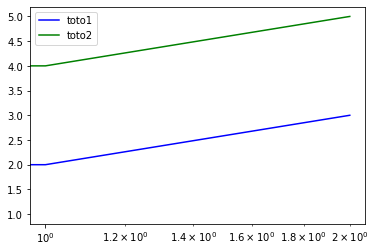

In [21]:
def graph(**kwargs):
  colors = "bgrcmykw:"
  fig, ax = plt.subplots()

  for name,color in zip(kwargs,colors):
    ax.semilogx(kwargs[name],color,label=name)
  ax.legend()
  plt.show()

# exemple d'utilisation
graph(toto1=[1,2,3],toto2=[3,4,5])

28.586099999998545
10.824038759242192
9.173849475156215
8.061049911013232
7.201559247116628
6.532997508154351
6.010152652566455
5.598785876647284
5.27292308159899
5.012837163661568
4.803525558752612
4.63356096255436
4.494223520246137
4.378845344999485
4.282315230905041
4.20070424693488
4.130982564332181
4.070805157166903
4.018349510173744
3.972192610731378
3.9312176256265614
3.894543018849673
3.861468643133083
3.831434677773536
3.80399029590345
3.7787697067745243
3.7554737938470546
3.7338560035606583
3.7137114673019407
3.6948685864396804
3.6771824970957594
3.6605299724336438
3.6448054268872645
3.6299177673849607
3.615787897616541
3.602346727564483
3.589533575494509
3.5772948761204524
3.565583128783437
3.5543560347788166
3.5435757846000002
3.5332084647369157
3.5232235604371276
3.513593536018622
3.5042934782961077
3.4953007917393784
3.486594936339316
3.478157200983147
3.469970506559638
3.462019234122634
3.454289074310843
3.4467668949077472
3.43944062396867
3.4322991463770376
3.4253322120

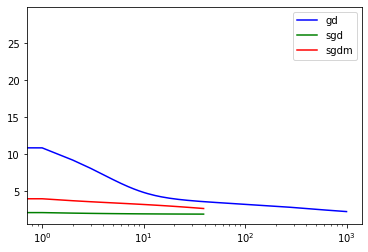

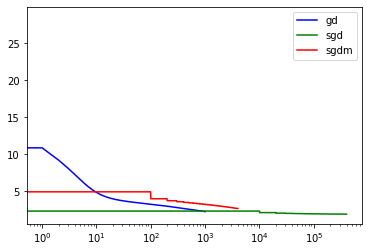

In [22]:
training_data_2 = training_data[0:10000]
w = np.zeros(len(training_data_2[0][0]))
b=0

costs_gd = optimize_gd(w,b,training_data_2,rate=5e-3,maxiter=1000,info=1,epsilon=0.01)[2]
costs_sgd = optimize_sgd(w,b,training_data_2)[2]
costs_sgdm = optimize_sgdm(w,b,training_data_2)[2]

graph(gd=costs_gd,sgd=costs_sgd,sgdm=costs_sgdm)

#En réalité, ce premier graphe n'est pas significatif. A chaque fois, qu'on a rajouté une valeur de cout dans le tableau costs de sgd et sgdm, on avait modifié
#w (et b) respectivement 10 000 fois (len(training_data)) et 100 fois (len(training_data)/mini_batch_size)
#On peut donc construire un deuxième graphe plus significatif :

costs_sgd2 = []
costs_sgdm2 = []

for c in costs_sgd:
  for i in range(10000):
    costs_sgd2.append(c)

for c in costs_sgdm:
  for i in range(100):
    costs_sgdm2.append(c)

graph(gd=costs_gd,sgd=costs_sgd2,sgdm=costs_sgdm2)

  

### Question 12

In [23]:
def optimize_sgd_moment(w,b,training_data,rate=1e-3,mu=0.95,maxiter=40,info=1,epsilon = 0.00001) :
  iter = 0
  normGrad = 1
  n = len(training_data)
  costs = []
  vw  = 0
  vb = 0

  while(normGrad>epsilon and iter<maxiter) :
    for i in range(len(training_data)):
      cout, gradw, gradb = propagate(w,b,training_data[i:i+1])

      vw = mu*vw - rate*gradw
      vb = mu*vb - rate*gradb
      w += vw
      b += vb
    cout = 0
    for x,y in training_data :
      cout += ((y-np.vdot(w,x)-b)**2)/n
    costs.append(cout)
    if(iter%info == 0) :
      print(cout)
    iter +=1 
    normGrad = np.linalg.norm(gradw)**2 + np.linalg.norm(gradb)**2
  return(w,b,costs)

In [24]:
training_data_2 = training_data[0:10000]
w = np.zeros(len(training_data_2[0][0]))
b=0

w,b,costs = optimize_sgd_moment(w,b,training_data_2,rate=5e-5,mu=0.95,maxiter=40,info=1,epsilon=0.00001)

print(w,b,costs)
test_params(w,b,test_data)

2.236134831039554
2.1550334449792445
2.120466624690989
2.101647045007386
2.0904870820328827
2.083379508386894
2.078541756350194
2.0750328604647383
2.0723282396414557
2.070122303769894
2.0682310883517006
2.0665413818105303
2.064982670061929
2.063510905185602
2.0620987358345393
2.0607294453121194
2.0593931072370086
2.0580841119923954
2.0567995616347017
2.0555382247186724
2.0542998564020287
2.053084758630092
2.051893498747401
2.050726732773245
2.0495850977141092
2.0484691492075395
2.0473793286876143
2.0463159495215195
2.0452791950818434
2.04426912407766
2.0432856800505204
2.0423287030069788
2.0413979418757
2.04049306695848
2.0396136818671824
2.0387593346539843
2.0379295279841023
2.037123728293703
2.036341373934843
2.035581882346252
[-1.71099795e-04 -7.52034385e-03  9.24572032e-03  9.85923955e-02
 -1.17296271e-01 -1.71606284e-01 -2.43976621e-01 -6.31293019e-01
 -4.04147010e-01 -8.25862864e-02 -2.23539667e-02 -7.92830772e-01
 -1.40959072e-01 -5.13991765e-01  5.45339238e-01  4.60486541e-01
 

0.2864

### Question 13

Par cohérence, j'ai renommé l'algorithme suivant.

In [25]:
def optimize_gd_nesterov(w,b,training_data,rate=5e-5,mu=0.95,maxiter=500,info=10,epsilon = 0.00001) :
  iter = 0
  costs = []

  v = 0
  wp = w
  cout, gradw, gradb = propagate(w,b,training_data)
  normGrad = np.linalg.norm(gradw)**2 + gradb**2

  while(normGrad>epsilon and iter<maxiter) :
    wp = w + mu*v
    cout, gradw, gradb = propagate(wp,b,training_data)
    v = mu*v - rate*gradw
    w += v
    b = b - rate*gradb
    costs.append(cout)
    if(iter%info ==0) :
      print(cout)
    normGrad = np.linalg.norm(gradw)**2 + gradb**2
    iter +=1
  return(w,b,costs)

In [26]:
training_data_2 = training_data[0:10000]
w = np.zeros(len(training_data_2[0][0]))
b=0

w,b,costs = optimize_gd_nesterov(w,b,training_data_2,rate=5e-4,mu=0.95,maxiter=40,info=1,epsilon=0.00001)

print(w,b,costs)
test_params(w,b,test_data)

28.586099999998545
21.99124596833196
15.838832260856405
11.792838713104908
10.235732210125338
10.4878592325856
11.385687830883771
11.885868163972214
11.447777929350634
10.106233558797495
8.294310713426666
6.558093718905575
5.307321299089646
4.690388628817026
4.607565227337775
4.817630461552589
5.069060784262327
5.197011274512866
5.157788461629649
5.0054011124404925
4.836376466663409
4.734035264052264
4.734622493667468
4.822548343651068
4.948330731917208
5.055635936809182
5.104079234954174
5.079924608903337
4.993844883415184
4.870246336292811
4.734692197613436
4.6048257228216745
4.487254084688847
4.379791795056849
4.276524015310429
4.172779152600986
4.067991472999693
3.9658707944898226
3.872550845474024
3.794014922164932
[-1.32805536e-07 -2.95947118e-06 -9.60505097e-06  2.34076923e-05
 -1.01201964e-04 -6.69089892e-04 -7.46402203e-04 -2.19627828e-03
 -5.33663328e-03 -1.03264127e-02 -2.42541927e-02 -3.17656711e-02
 -9.26224779e-03  2.38420618e-03  7.96214769e-03  5.22365986e-03
 -1.879906

0.2726

En choisissant un learning rate $\eta = 5.10^{-4}$, il semble que l'on trouve l'accuracy la plus satisfaisante qui vaut 27%

In [27]:
def optimize_sgd_nesterov(w,b,training_data,rate=1e-5,mu=0.95,maxiter=40,info=1,epsilon=0.00001):
  iter = 0
  normGrad = 1
  n = len(training_data)
  costs = []
  v  = 0

  while(normGrad>epsilon and iter<maxiter) :
    for i in range(len(training_data)):
      wp = w + mu*v
      cout, gradw, gradb = propagate(w,b,training_data[i:i+1])
      v = mu*v - rate*gradw
      w = w + v
      b = b - rate*gradb
    cout = 0
    for x,y in training_data :
      cout += ((y-np.vdot(w,x)-b)**2)/n
    costs.append(cout)
    if(iter%info == 0) :
      print(cout)
    iter +=1 
    normGrad = np.linalg.norm(gradw)**2 + gradb**2
  return(w,b,costs)

In [28]:
training_data_2 = training_data[0:10000]
w = np.zeros(len(training_data_2[0][0]))
b=0

w,b,costs = optimize_sgd_nesterov(w,b,training_data_2,rate=1e-4,mu=0.95,maxiter=40,info=1)

print(w,b,costs)
test_params(w,b,test_data)

3.1552572664773773
2.906782309191827
2.730728909869103
2.5991923399293024
2.5000444750818915
2.4248652434053954
2.3675858701516432
2.323778789077757
2.2901729326984364
2.264326563149706
2.244403237966691
2.229014243072239
2.2171051308649767
2.2078726311258254
2.2007031138686584
2.195126664020363
2.190782619138527
2.187393599828787
2.1847458718006942
2.182674450696576
2.1810517731145658
2.1797790579683456
2.1787797034814775
2.1779942287036618
2.1773763899906307
2.1768901935406535
2.1765075929124746
2.176206711354338
2.1759704670907642
2.1757855086338216
2.175641389073251
2.175529924909148
2.1754446976271935
2.1753806658533303
2.1753338632930466
2.1753011633049932
2.175280095294461
2.1752687014477363
2.175265424899962
2.1752690224159417
[-5.13587958e-04 -9.18715456e-03  5.59036127e-03  1.47936668e-01
 -2.23360883e-01 -2.24970728e-01 -3.56564640e-01 -5.33899442e-01
 -2.90297973e-01 -1.97888149e-01  1.28279046e-01 -9.16272591e-01
  5.01160461e-02 -8.59624258e-01  7.62900078e-01  4.00762999

0.2797

On obtient une accuracy de 29%.

### Question 14

In [29]:
def optimize_sgd_adam(w,b,training_data,rate=1e-3,beta1=0.9,beta2=0.999,epsilon=1e-8,maxiter=10,info=1,eps=1e-3):
  iter = 0
  normGrad = 1
  n = len(training_data)
  costs = []
  vw  = 0
  vb = 0
  mw = 0
  mb = 0

  while(normGrad>eps and iter<maxiter) :
    print(iter)

    for i in range(len(training_data)):
      cout, gradw, gradb = propagate(w,b,training_data[i:i+1])

      mw = beta1*mw + (1-beta1)*gradw
      mb = beta1*mb +(1-beta1)*gradb

      vw = beta2*vw + (1-beta2)*((gradw)**2)
      vb = beta2*vb + (1-beta2)*((gradb)**2)  

      w = w - (rate/(np.sqrt(vw/(1-beta2**(i+1))+epsilon)))*(mw/(1-beta1**(i+1)))
      b = b - (rate/(np.sqrt(vb/(1-beta2**(i+1))+epsilon)))*(mb/(1-beta1**(i+1)))
      
    cout = 0
    for x,y in training_data :
      cout += ((y-np.vdot(w,x)-b)**2)/n
    costs.append(cout)
    if(iter%info == 0) :
      print(cout)
    iter +=1 
    normGrad = np.linalg.norm(gradw)**2 + np.linalg.norm(gradb)**2
  return(w,b,costs)

In [30]:
training_data_2 = training_data[0:10000]
w = np.zeros(len(training_data_2[0][0]))
b=0

w,b,costs = optimize_sgd_adam(w,b,training_data,rate=1e-4,beta1=0.9,beta2=0.999,epsilon=1e-8,maxiter=10,info=1,eps=1e-6)

print(w,b,costs)
test_params(w,b,test_data)

0
2.6351534541405437
1
2.3174791692187235
2
2.1509680202032957
3
2.0555702996926017
4
1.9989715286315852
5
1.9645957572336443
6
1.9432442410894095
7
1.929653134060779
8
1.9207591345373258
9
1.914756058782964
[ 7.02295203e-02 -2.51230645e-01 -2.20855155e-01  2.27396528e-02
 -2.28467646e-02  2.07301617e-01 -6.15394502e-02 -2.77881403e-01
 -2.99850453e-01  1.02430449e-03  3.62525746e-02 -5.32364349e-01
 -1.68240261e-01  6.90296008e-02  4.43040394e-01  4.48257477e-01
 -3.41010049e-01 -3.81146681e-01 -3.61959808e-02 -3.65599737e-01
 -3.76290745e-01  1.42375807e-01  6.12276284e-01  4.38128479e-01
  1.64525639e-01  2.05648459e-01 -1.25997012e-01 -9.87097685e-02
  8.61433972e-02 -7.42898832e-03  1.33203344e-01 -3.06484094e-02
  3.62409579e-01  2.96141315e-01  4.53042214e-01  2.08700143e-01
  1.54681341e-01  3.18503665e-02 -1.56430077e-01 -3.43750406e-01
  1.62594681e-01 -8.09940632e-02 -3.92480426e-01  2.01392870e-01
 -1.77106648e-01 -3.81193020e-01 -1.33826844e-01 -1.04972555e-01
 -3.97833945

0.3686

On arrive à un résultat de 35,9%, pour un taux d'apprentissage $\eta = 10^{-4}$.

### Question 15 (Bonus)

In [31]:
def optimize_sgd_nadam(w,b,training_data,rate=1e-3,beta1=0.9,beta2=0.999,epsilon=1e-8,maxiter=10,info=1,eps=1e-3):
  iter = 0
  normGrad = 1
  n = len(training_data)
  costs = []
  vw  = 0
  vb = 0
  mw = 0
  mb = 0

  while(normGrad>eps and iter<maxiter) :
    print(iter)

    for i in range(len(training_data)):
      cout, gradw, gradb = propagate(w,b,training_data[i:i+1])

      mw = beta1*mw + (1-beta1)*gradw #beta1 est le mu de l'article
      mb = beta1*mb +(1-beta1)*gradb

      vw = beta2*vw + (1-beta2)*((gradw)**2) #v est le n de l'article
      vb = beta2*vb + (1-beta2)*((gradb)**2) #beta2 est le nu de l'article

      mpw = beta1*mw/(1-beta1**(i+2)) + (1-beta1)*gradw/(1-beta1**(i+1)) #le p est le symbole ^ de l'article
      mpb = beta1*mb/(1-beta1**(i+2)) + (1-beta1)*gradb/(1-beta1**(i+1))

      vpw = beta2*vw/(1-beta2**(i+1))
      vpb = beta2*vb/(1-beta2**(i+1)) 

      w = w - (rate/(np.sqrt(vpw/(1-beta2**(i+1))+epsilon)))*(mpw/(1-beta1**(i+1)))
      b = b - (rate/(np.sqrt(vpb/(1-beta2**(i+1))+epsilon)))*(mpb/(1-beta1**(i+1)))

    cout = 0
    for x,y in training_data :
      cout += ((y-np.vdot(w,x)-b)**2)/n
    costs.append(cout)
    if(iter%info == 0) :
      print(cout)
    iter +=1 
    normGrad = np.linalg.norm(gradw)**2 + np.linalg.norm(gradb)**2
  return(w,b,costs)

In [32]:
training_data_2 = training_data[0:10000]
w = np.zeros(len(training_data_2[0][0]))
b=0

w,b,costs = optimize_sgd_nadam(w,b,training_data,rate=1e-4,beta1=0.9,beta2=0.999,epsilon=1e-8,maxiter=10,info=1,eps=1e-6)

print(w,b,costs)
test_params(w,b,test_data)

0
2.639211058541403
1
2.3206706912361166
2
2.153403719968786
3
2.0573625365630424
4
2.0002635890065057
5
1.9655221152294828
6
1.9439134315307527
7
1.9301458927802284
8
1.921132711525304
9
1.915049820743444
[ 6.99933323e-02 -2.54873033e-01 -2.27178123e-01  1.56363065e-02
 -2.45299014e-02  2.12482568e-01 -5.80848969e-02 -2.73082324e-01
 -2.95141101e-01  2.55730443e-03  3.60108947e-02 -5.32504955e-01
 -1.68214342e-01  6.93512782e-02  4.43963973e-01  4.47770795e-01
 -3.41737192e-01 -3.79697306e-01 -3.74899394e-02 -3.65587529e-01
 -3.76686466e-01  1.38880167e-01  6.11300718e-01  4.33999229e-01
  1.64981158e-01  2.04645729e-01 -1.26566081e-01 -9.76668314e-02
  8.98453417e-02 -7.77127756e-03  1.31340556e-01 -2.94209315e-02
  3.62018060e-01  2.95634299e-01  4.52920323e-01  2.09737487e-01
  1.54644209e-01  3.21073576e-02 -1.56265561e-01 -3.43050738e-01
  1.63211296e-01 -8.16972058e-02 -3.91656659e-01  2.02133762e-01
 -1.75439169e-01 -3.82855541e-01 -1.35699744e-01 -1.05835145e-01
 -3.88310444e-

0.3679

Dans ce cas, l'implémentation de NADAM, donne un résultat proche de ADAM.

### Question 16

In [ ]:
training_data_2 = training_data[0:10000]
w = np.zeros(len(training_data_2[0][0]))
b = 0

costs_gd = optimize_gd(w,b,training_data_2,rate=5e-3,maxiter=1000,info=1,epsilon=0.01)[2]
costs_sgd = optimize_sgd(w,b,training_data_2,rate=5e-5,maxiter=40,info=1,epsilon=0.00001)[2]
costs_sgdm = optimize_sgdm(w,b,training_data_2)[2]

costs_sgd_moment = optimize_sgd_moment(w,b,training_data,rate=5e-5,mu=0.95,maxiter=40,info=1,epsilon = 0.00001)[2]
costs_gd_nesterov = optimize_gd_nesterov(w,b,training_data_2,rate=5e-4,mu=0.95,maxiter=40,info=1,epsilon=0.00001)[2]
costs_sgd_nesterov = optimize_sgd_nesterov(w,b,training_data_2,rate=1e-4,mu=0.95,maxiter=40,info=1)[2]
costs_sgd_nadam = optimize_sgd_nadam(w,b,training_data,rate=1e-4,beta1=0.9,beta2=0.999,epsilon=1e-8,maxiter=10,info=1,eps=1e-6)[2]
costs_sgd_adam = optimize_sgd_adam(w,b,training_data,rate=1e-4,beta1=0.9,beta2=0.999,epsilon=1e-8,maxiter=10,info=1,eps=1e-6)[2]

graph(sgd=costs_sgd,sgdm=costs_sgdm,sgd_moment=costs_sgd_moment,gd_nesterov=costs_gd_nesterov,sgd_nesterov=costs_sgd_nesterov,sgd_nadam=costs_sgd_nadam, sgd_adam = costs_sgd_adam)

28.586099999998545
10.824038759242192
9.173849475156215
8.061049911013232
7.201559247116628
6.532997508154351
6.010152652566455
5.598785876647284
5.27292308159899
5.012837163661568
4.803525558752612
4.63356096255436
4.494223520246137
4.378845344999485
4.282315230905041
4.20070424693488
4.130982564332181
4.070805157166903
4.018349510173744
3.972192610731378
3.9312176256265614
3.894543018849673
3.861468643133083
3.831434677773536
3.80399029590345
3.7787697067745243
3.7554737938470546
3.7338560035606583
3.7137114673019407
3.6948685864396804
3.6771824970957594
3.6605299724336438
3.6448054268872645
3.6299177673849607
3.615787897616541
3.602346727564483
3.589533575494509
3.5772948761204524
3.565583128783437
3.5543560347788166
3.5435757846000002
3.5332084647369157
3.5232235604371276
3.513593536018622
3.5042934782961077
3.4953007917393784
3.486594936339316
3.478157200983147
3.469970506559638
3.462019234122634
3.454289074310843
3.4467668949077472
3.43944062396867
3.4322991463770376
3.4253322120

Sur ces données, il apparaît clairement que les méthodes adam et nadam convergent très rapidement (elles sont confondues). De plus, on voit que les méthodes stochastiques convergent au moins aussi rapidement que les méthodes de descente de gradient calculé sur l'ensemble de l'ensemble test. Il n'y a pas besoin d'évaluer le gradient sur l'ensemble du jeu de données.